In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE



# 移除無關變數
data.drop(['id'], axis=1, inplace=True)

# 類別型變數One-Hot Encoding
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
data = pd.get_dummies(data, columns=categorical_vars)

# 特徵縮放
scaler = StandardScaler()
continuous_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
data[continuous_vars] = scaler.fit_transform(data[continuous_vars])

# 分割資料集
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 處理類別不平衡
smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("資料前處理完成")
display(data)


資料前處理完成


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_0,...,SCC_0,SCC_1,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,3,0,...,1,0,0,1,0,0,0,0,1,0
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1,1,...,1,0,0,0,1,1,0,0,0,0
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,0,1,...,1,0,0,0,1,0,0,0,1,0
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,6,1,...,1,0,0,1,0,0,0,0,1,0
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,3,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.227725,0.760293,0.996987,0.888355,0.338364,0.201151,0.416056,-0.697686,5,0,...,1,0,0,1,0,0,0,0,1,0
20754,-1.027052,0.111729,-1.436296,1.039171,1.756085,-1.691863,1.214691,0.636513,0,0,...,1,0,0,1,0,0,0,0,1,0
20755,-0.657669,1.366537,0.670717,-0.071439,0.338364,-0.048349,0.210303,0.966092,5,0,...,1,0,0,0,1,0,0,0,1,0
20756,1.760067,-0.002805,-0.165574,0.422594,-1.119801,0.189694,-1.171141,0.593055,3,0,...,1,0,0,0,1,1,0,0,0,0


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd


# 訓練模型
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f'模型準確率: {accuracy}')

# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print('混淆矩陣:')
print(conf_matrix)

# 計算分類報告
class_report = classification_report(y_test, y_pred, target_names=[
    'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 
    'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
])
print('分類報告:')
print(class_report)


模型準確率: 0.8870423892100193
混淆矩陣:
[[471  49   3   1   0   0   0]
 [ 23 553  40  10   0   0   0]
 [  1  65 351  58   9   0   0]
 [  0  16  57 404  34   3   0]
 [  1   3  20  44 462  12   1]
 [  0   0   0   2  15 640   0]
 [  0   0   1   0   0   1 802]]
分類報告:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.90      0.92       524
      Normal_Weight       0.81      0.88      0.84       626
 Overweight_Level_I       0.74      0.73      0.73       484
Overweight_Level_II       0.78      0.79      0.78       514
     Obesity_Type_I       0.89      0.85      0.87       543
    Obesity_Type_II       0.98      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804

           accuracy                           0.89      4152
          macro avg       0.88      0.87      0.88      4152
       weighted avg       0.89      0.89      0.89      4152



C:\Users\b0983\AppData\Local\Temp\ipykernel_9556\971405735.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


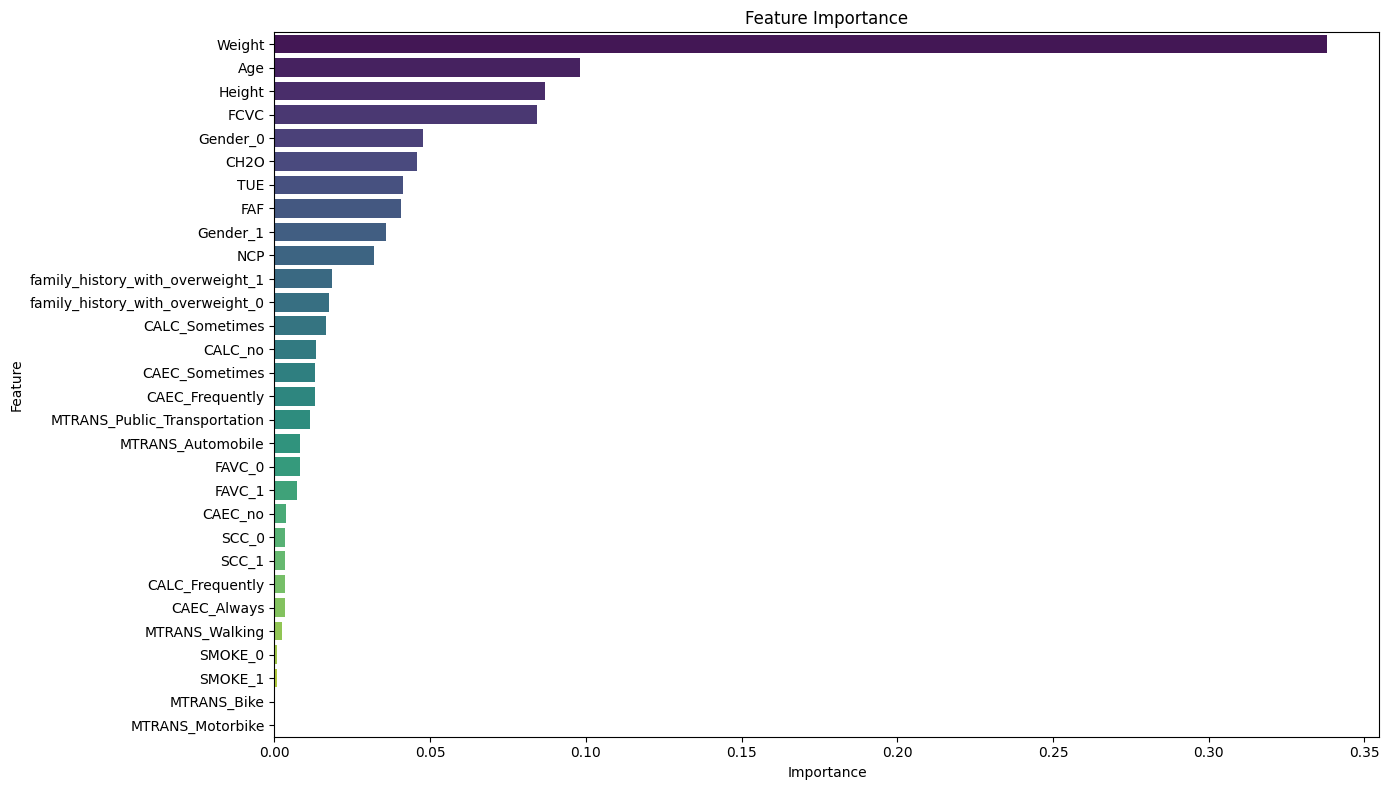

                             Feature  Importance
2                             Weight    0.337941
0                                Age    0.098242
1                             Height    0.087044
3                               FCVC    0.084203
8                           Gender_0    0.047869
5                               CH2O    0.045793
7                                TUE    0.041316
6                                FAF    0.040496
9                           Gender_1    0.035912
4                                NCP    0.032109
11  family_history_with_overweight_1    0.018419
10  family_history_with_overweight_0    0.017593
23                    CALC_Sometimes    0.016477
24                           CALC_no    0.013219
16                    CAEC_Sometimes    0.012993
15                   CAEC_Frequently    0.012959
28      MTRANS_Public_Transportation    0.011348
25                 MTRANS_Automobile    0.008355
12                            FAVC_0    0.008079
13                  

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 提取特徵重要性
feature_importances = model.feature_importances_
features = X.columns

# 創建特徵重要性 DataFrame
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 繪製特徵重要性圖表
plt.figure(figsize=(14, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# 顯示特徵重要性數據框
print(importance_df.head(20))

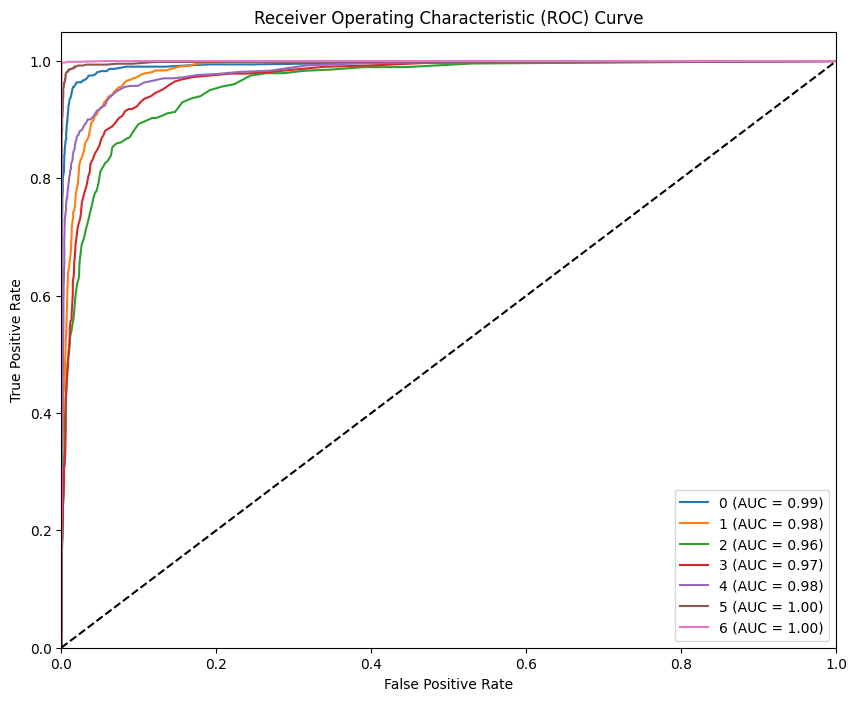

AUC of 0: 0.99
AUC of 1: 0.98
AUC of 2: 0.96
AUC of 3: 0.97
AUC of 4: 0.98
AUC of 5: 1.00
AUC of 6: 1.00


In [30]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# 預測測試集的概率
y_prob = model.predict_proba(X_test)

# 計算每個類別的AUC值
auc_scores = {}
for i, class_label in enumerate(model.classes_):
    auc = roc_auc_score(y_test == class_label, y_prob[:, i])
    auc_scores[class_label] = auc

# 繪製ROC曲線
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(model.classes_):
    fpr, tpr, _ = roc_curve(y_test == class_label, y_prob[:, i])
    plt.plot(fpr, tpr, label=f'{class_label} (AUC = {auc_scores[class_label]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 打印AUC值
for class_label, auc in auc_scores.items():
    print(f'AUC of {class_label}: {auc:.2f}')


In [31]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

# 將多類別標籤二值化
y_test_binarized = label_binarize(y_test, classes=model.classes_)
y_pred_binarized = label_binarize(y_pred, classes=model.classes_)

# 計算微觀AUC值
micro_auc = roc_auc_score(y_test_binarized, y_prob, average='micro')

# 計算宏觀AUC值
macro_auc = roc_auc_score(y_test_binarized, y_prob, average='macro')

print(f'微觀AUC值: {micro_auc:.2f}')
print(f'宏觀AUC值: {macro_auc:.2f}')


微觀AUC值: 0.99
宏觀AUC值: 0.98
